## Box Plots
A box plot is another way of showing the relationship between a numeric variable and a categorical variable. Compared to the violin plot, the box plot leans more on the summarization of the data, primarily just reporting a set of descriptive statistics for the numeric values on each categorical level. A box plot can be created using seaborn's boxplot() function.

## Example 1. Violin versus Box plot

(6.966470319355814, 63.09321945242605)

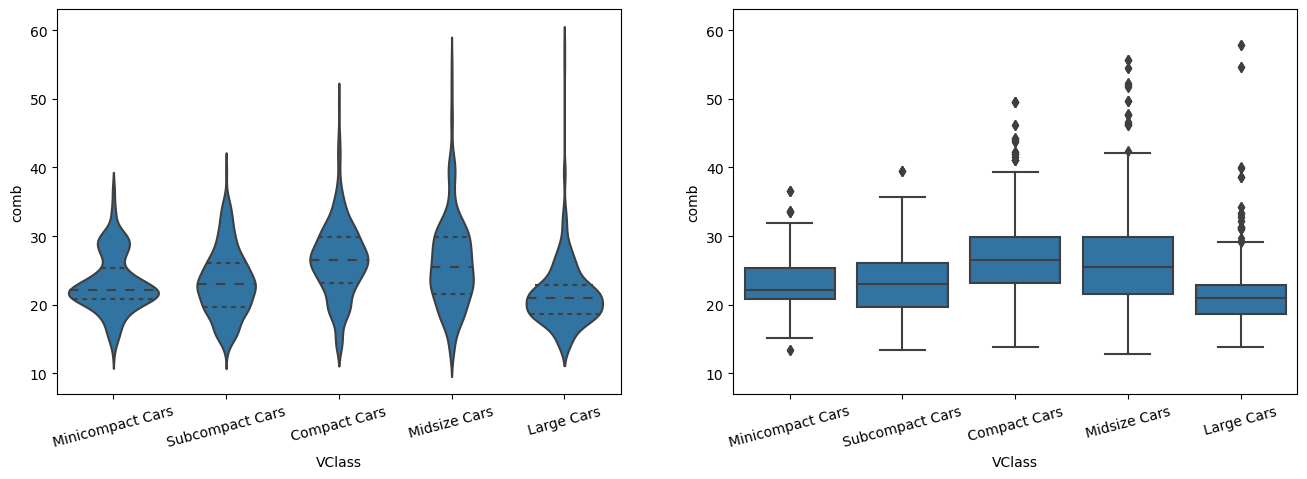

In [2]:
# Step 1. Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Step 2. Load data
fuel_econ = pd.read_csv('./fuel-econ.csv')

# Step 3. Convert the "VClass" column from a plain object type into an ordered categorical type 
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

# Step 4.  TWO PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner='quartile')
plt.xticks(rotation=15);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

Note that the "color" parameter is being used here to make each box the same color. In order to provide a better comparison of the violin and box plots, a ylim expression has been added to the second plot to match the two plots' y-axis limits. The Axes object returned by violinplot() is assigned to 

The inner boxes and lines in the violin plot match up with the boxes and whiskers in the box plot. In a box plot, the central line in the box indicates the median of the distribution, while the top and bottom of the box represent the third and first quartiles of the data, respectively. Thus, the height of the box is the interquartile range (IQR). From the top and bottom of the box, the whiskers indicate the range from the first or third quartiles to the minimum or maximum value in the distribution. Typically, a maximum range is set on whisker length; by default, this is 1.5 times the IQR. For the Gamma level, there are points below the lower whisker that indicate individual outlier points that are more than 1.5 times the IQR below the first quartile.

Comparing the two plots, the box plot is a cleaner summary of the data than the violin plot. It's easier to compare statistics between the groups with a box plot. This makes a box plot worth more consideration if you have a lot of groups to compare, or if you are building explanatory plots. You can clearly see from the box plot that the Delta group has the lowest median. On the other hand, the box plot lacks as nuanced a depiction of distributions as the violin plot: you can't see the slight bimodality present in the Alpha level values. The violin plot may be a better option for exploration, especially since seaborn's implementation also includes the box plot by default.

## Additional Variations
As with violinplot, boxplot can also render horizontal box plots by setting the numeric and categorical features to the appropriate arguments.

## Example 2. Horizontal box plot

<Axes: xlabel='comb', ylabel='VClass'>

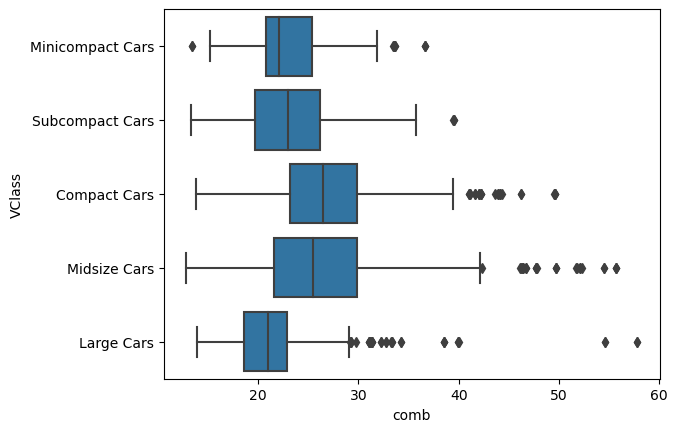

In [3]:
sb.boxplot(data=fuel_econ, y='VClass', x='comb', color=base_color)


In violinplot, there is an additional option for plotting summary statistics in the violin, beyond the default mini box plot. By setting inner = 'quartile', three lines will be plotted within each violin area for the three middle quartiles. The line with thick dashes indicates the median, and the two lines with shorter dashes on either side the first and third quartiles.

## Example 3. Violin plot with quartile information in the middle

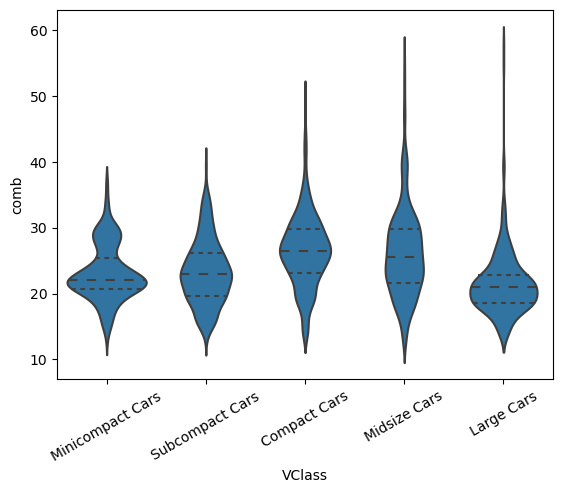

In [4]:
base_color = sb.color_palette()[0]
sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner='quartile')
plt.xticks(rotation=30);